### Linear Regression Implementation

### Steps For Machine Learning Model:
1. Dataset Availability
2. Divide the data in independent and dependent feature
3. Train Test Split Data
4. Standardize the Data
5. Train the model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


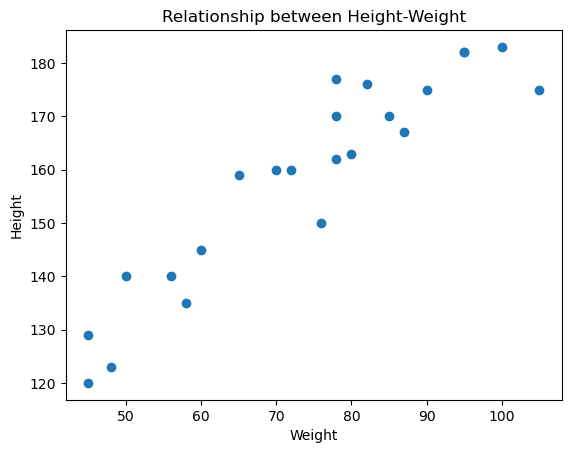

In [4]:
## scatter plot
plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title('Relationship between Height-Weight')
plt.show()

In [5]:
## Correaltion (Perason)
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [6]:
import seaborn as sns

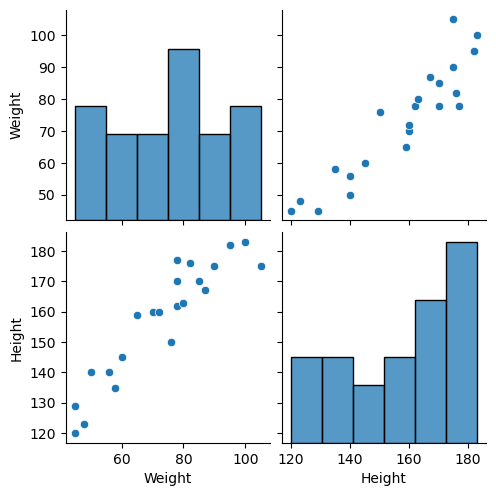

In [7]:
sns.pairplot(df)

### Observation:
Linear Relationship or linearly correlated

In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [9]:
## Independent and dependent features
## Independent feature should be a dataframe or a 2D array
X = df[['Weight']]
np.array(X).shape


(23, 1)

In [10]:
# Series / 1D array
X_series = df['Weight']
np.array(X_series).shape


(23,)

In [11]:
## Dependent Feature / 1D array
y = df['Height']
y.shape

(23,)

In [12]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
X_train.shape

(18, 1)

#### Standardization is only for independent feature to level up every feature in a single unit

In [ ]:
### Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train) # (value - mean)/standard_deviation

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [17]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [18]:
regression.fit(X_train,y_train)

LinearRegression()

In [19]:
print("Coefficeint : ",regression.coef_) ## slope

Coefficeint :  [17.03440872]


In [20]:
print("Intercept: ",regression.intercept_)

Intercept:  157.5


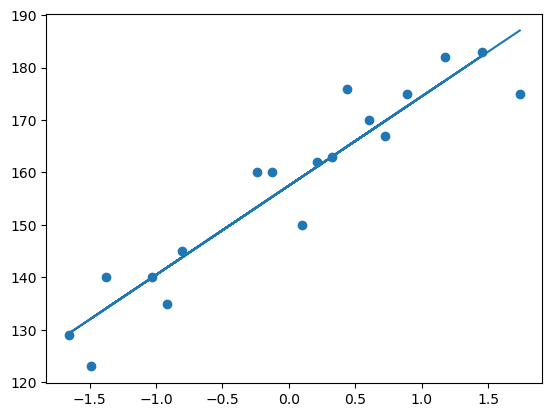

In [21]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### Prediction of test data
1. predicted height output = intercept + slope*(Weight)
2. y_pred_test = 156.47058823529412 + 17.2982057*(Weight)


In [22]:
### Prediction for test data
y_pred = regression.predict(X_test)

In [23]:
### Performance Metircs
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
from math import sqrt


mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = sqrt(mse)

In [25]:
print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)

MSE:  109.77592599051654
MAE:  9.822657814519227
RMSE:  10.477400726827076


## R Square
R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = sum of total squares

In [26]:
from sklearn.metrics import r2_score


In [27]:
r2_score = r2_score(y_test,y_pred)

In [28]:
r2_score

0.7769869860423441

### Adjusted R Square

Adjusted R square = 1 - (1-R^2)x n-1/n-k-1

R^2 is the coefficient of determination (model score),
n is the number of observations (rows in test set),
k is the number of predictor variables (features in X_test).

 

In [29]:
1 - (1-r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [30]:
### OlS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [31]:
predict = model.predict(X_test)
predict

array([  3.58467086,   3.58467086, -28.1958439 ,  19.95645118,
        -8.93492586])

In [32]:
model.summary()

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Fri, 01 Aug 2025   Prob (F-statistic):                       0.661
Time:                        17:21:54   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.0344     38.226      0.446      0.661     -63.616      97.684
==============================================================================
Omnibus:                        0.849   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.661
Skew:                          -0.428   Prob(JB):                        0.718
Kurtosis:                       2.614   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
### Predicting a new value
regression.predict(scaler.transform([[72]]))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.30639545])

In [34]:
regression.predict([[0.33]])

array([163.12135488])

In [35]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])